In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertModel, BertTokenizer, AutoTokenizer, AutoModelForSequenceClassification
import torch ####

c:\Users\samue\anaconda3\envs\finalproject\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pd.read_csv(r'C:\Users\samue\OneDrive\Escritorio\Docs\4GeeksAcademy\FINAL_PROJECT\4geeks_finalproject\src\Final_ds_200.csv')

In [18]:
# Cargar el modelo y el tokenizer de BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

c:\Users\samue\anaconda3\envs\finalproject\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internall

In [2]:
import tensorflow
from tensorflow.python.client import device_lib
def print_info():
     print('  Versión de TensorFlow: {}'.format(tensorflow.__version__))
     print('  GPU: {}'.format([x.physical_device_desc for x in device_lib.list_local_devices() if x.device_type == 'GPU']))
     print('  Versión Cuda  -> {}'.format(tensorflow.sysconfig.get_build_info()['cuda_version']))
     print('  Versión Cudnn -> {}\n'.format(tensorflow.sysconfig.get_build_info()['cudnn_version']))
print_info()

  Versión de TensorFlow: 2.10.0
  GPU: ['device: 0, name: NVIDIA GeForce RTX 4060, pci bus id: 0000:01:00.0, compute capability: 8.9']
  Versión Cuda  -> 64_112
  Versión Cudnn -> 64_8



In [3]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [8]:
def embed_text(text):
    
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512).to("cuda")
    #aseguramos que pytorch no calcule ni almacene gradientes, Para ahorro de memoria ya que no necesario ahora.
    with torch.no_grad():
        #pasamos los inputs tokenizados a traves de bert para obtener los outputs
        outputs = model(**inputs)
    #
    return outputs.last_hidden_state[:, 0, :].cpu().numpy()

# Mover el modelo a la GPU
model.to("cuda")


data['embedding'] = data['text'].apply(embed_text)

c:\Users\samue\anaconda3\envs\finalproject\lib\site-packages\transformers\models\bert\modeling_bert.py:439: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


In [9]:
import pickle

# Supongamos que tu DataFrame se llama `df`
# Guardar en formato pickle
with open('data.pkl', 'wb') as file:
    pickle.dump(data, file)

NameError: name 'data' is not defined

In [4]:
import pickle

# Cargar el DataFrame
with open(r'data.pkl', 'rb') as file:
    df = pickle.load(file)

In [5]:
df.head()

,date,year,month,day,author,title,article,url,section,publication,text,embedding
0,2019-06-24 00:00:00,2019,6.0,24,NaN,Brazil's antitrust regulator wants competition...,SAO PAULO (Reuters) - Brazil’s antitrust regul...,https://www.reuters.com/article/aviancabrasil-...,Business News,Reuters,Brazil's antitrust regulator wants competition...,"[[-0.68184555, -0.18527356, -0.23886709, 0.099..."
1,2016-04-20 00:00:00,2016,4.0,20,NaN,"U.S. crude stockpiles rise, distillates post s...",NEW YORK (Reuters) - U.S. crude oil inventorie...,http://www.reuters.com/article/us-usa-oil-eia-...,Business News,Reuters,"U.S. crude stockpiles rise, distillates post s...","[[-0.77582204, -0.63396996, 0.3521567, 0.27988..."
2,2016-03-01,2016,3.0,1,NaN,BRIEF-Tullett Prebon FY operating profit 107.9...,March 1 (Reuters) - Tullett Prebon Plc * Final...,http://www.reuters.com/article/idUSASN0000TH,Financials,Reuters,BRIEF-Tullett Prebon FY operating profit 107.9...,"[[-0.530398, -0.11855964, -0.010928238, -0.419..."
3,2019-04-06,2019,4.0,6,NaN,Brazil bridge collapse could affect grain ship...,SAO PAULO (Reuters) - Part of a bridge over th...,https://www.reuters.com/article/us-brazil-grai...,World News,Reuters,Brazil bridge collapse could affect grain ship...,"[[-0.7998818, -0.57829016, -0.33753592, 0.0234..."
4,2018-09-07,2018,9.0,7,NaN,Wild C Staal awaiting contract talks after sea...,"Eric Staal, Minnesota’s leading scorer a seaso...",https://www.reuters.com/article/icehockey-nhl-...,Sports News,Reuters,Wild C Staal awaiting contract talks after sea...,"[[-0.60555786, -0.5394229, -0.29534513, -0.122..."


In [6]:
import numpy as np

# Convertir la columna de embeddings en una matriz 2D (n_samples x n_features)
X = np.vstack(df['embedding'].values)

In [7]:
X

array([[-0.68184555, -0.18527356, -0.23886709, ...,  0.39312777,
         1.1588944 ,  0.06037229],
       [-0.77582204, -0.63396996,  0.3521567 , ...,  0.03731732,
         0.90939313, -0.38774943],
       [-0.530398  , -0.11855964, -0.01092824, ..., -0.26275316,
         0.46574318,  0.5691025 ],
       ...,
       [-0.72575665,  0.20673034, -0.35186103, ..., -0.4142496 ,
        -0.14742903,  0.27500778],
       [-0.70065725, -0.11551719, -0.09097329, ..., -0.28801528,
         0.65831697,  0.01675514],
       [ 0.12737174, -0.14400274,  0.03967843, ...,  0.08859735,
         0.95491695,  0.16727191]], dtype=float32)

### Buscamos el numero de clusters idóneo

c:\Users\samue\anaconda3\envs\finalproject\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\samue\anaconda3\envs\finalproject\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\samue\anaconda3\envs\finalproject\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\samue\anaconda3\envs\finalproject\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default 

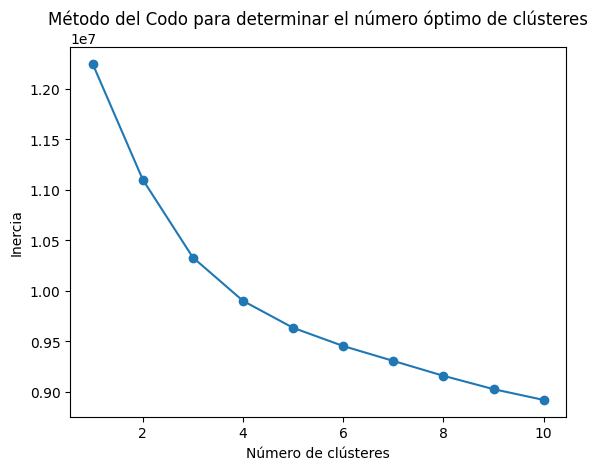

In [33]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calcular el error cuadrático medio (inercia) para diferentes números de clústeres
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de clústeres')
plt.ylabel('Inercia')
plt.title('Método del Codo para determinar el número óptimo de clústeres')
plt.show()

In [35]:
# Supongamos que elegimos 5 clústeres basado en el método del codo
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

c:\Users\samue\anaconda3\envs\finalproject\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [2]:
df['cluster'].value_counts()

NameError: name 'df' is not defined

In [50]:
clust_0 = df[df['cluster'] == 0]
clust_1 = df[df['cluster'] == 1]
clust_2 = df[df['cluster'] == 2]
clust_3 = df[df['cluster'] == 3]
clust_4 = df[df['cluster'] == 4]

In [52]:
clust_0.head(2)

,date,year,month,day,author,title,article,url,section,publication,text,embedding,cluster
10,2016-01-11,2016,1.0,11,NaN,MOVES-Sun Life Financial names Randolph Brown ...,Jan 11 (Reuters) - Canadian insurer Sun Life F...,http://www.reuters.com/article/sun-life-fin-in...,Market News,Reuters,MOVES-Sun Life Financial names Randolph Brown ...,"[[-0.49447185, -0.102266826, -0.2163461, -0.32...",0
11,2019-06-25 00:00:00,2019,6.0,25,NaN,Canada's Group Mach waives financing condition...,June 25 (Reuters) - Real estate developer Grou...,https://www.reuters.com/article/transat-at-ma-...,Company News,Reuters,Canada's Group Mach waives financing condition...,"[[-0.33506125, -0.19594921, -0.24978119, -0.21...",0


In [51]:
clust_1.head(2)

,date,year,month,day,author,title,article,url,section,publication,text,embedding,cluster
3,2019-04-06,2019,4.0,6,NaN,Brazil bridge collapse could affect grain ship...,SAO PAULO (Reuters) - Part of a bridge over th...,https://www.reuters.com/article/us-brazil-grai...,World News,Reuters,Brazil bridge collapse could affect grain ship...,"[[-0.7998818, -0.57829016, -0.33753592, 0.0234...",1
17,2016-09-02 00:00:00,2016,9.0,2,Eugene Scott,A reel honor: Scientists name new fish after O...,Washington (CNN)It isn't exactly a squid pro q...,https://www.cnn.com/2016/09/02/politics/fish-n...,politics,CNN,A reel honor: Scientists name new fish after O...,"[[-0.34852073, -0.56310093, -0.8051641, 0.1025...",1


In [43]:
clust_2.head(2)

,date,year,month,day,author,title,article,url,section,publication,text,embedding,cluster
2,2016-03-01,2016,3.0,1,NaN,BRIEF-Tullett Prebon FY operating profit 107.9...,March 1 (Reuters) - Tullett Prebon Plc * Final...,http://www.reuters.com/article/idUSASN0000TH,Financials,Reuters,BRIEF-Tullett Prebon FY operating profit 107.9...,"[[-0.530398, -0.11855964, -0.010928238, -0.419...",2
24,2016-08-08,2016,8.0,8,NaN,BRIEF-Rexahn Pharmaceuticals Q2 loss per share...,Aug 8 (Reuters) - Rexahn Pharmaceuticals Inc *...,http://www.reuters.com/article/idUSASC091FK,Market News,Reuters,BRIEF-Rexahn Pharmaceuticals Q2 loss per share...,"[[-0.45264232, -0.15241823, -0.020947171, -0.5...",2


In [44]:
clust_3.head(2)

,date,year,month,day,author,title,article,url,section,publication,text,embedding,cluster
4,2018-09-07,2018,9.0,7,NaN,Wild C Staal awaiting contract talks after sea...,"Eric Staal, Minnesota’s leading scorer a seaso...",https://www.reuters.com/article/icehockey-nhl-...,Sports News,Reuters,Wild C Staal awaiting contract talks after sea...,"[[-0.60555786, -0.5394229, -0.29534513, -0.122...",3
6,2018-08-17 17:52:00,2018,8.0,17,Colleen Kratofil,Kylie Jenner Wears No Makeup on Vogue Australi...,Kylie Jenner is opening up and daring to bare ...,https://people.com/style/kylie-jenner-vogue-au...,style,People,Kylie Jenner Wears No Makeup on Vogue Australi...,"[[0.23338783, -0.19940333, -0.29631722, -0.454...",3


In [45]:
clust_4.head(2)

,date,year,month,day,author,title,article,url,section,publication,text,embedding,cluster
0,2019-06-24 00:00:00,2019,6.0,24,NaN,Brazil's antitrust regulator wants competition...,SAO PAULO (Reuters) - Brazil’s antitrust regul...,https://www.reuters.com/article/aviancabrasil-...,Business News,Reuters,Brazil's antitrust regulator wants competition...,"[[-0.68184555, -0.18527356, -0.23886709, 0.099...",4
1,2016-04-20 00:00:00,2016,4.0,20,NaN,"U.S. crude stockpiles rise, distillates post s...",NEW YORK (Reuters) - U.S. crude oil inventorie...,http://www.reuters.com/article/us-usa-oil-eia-...,Business News,Reuters,"U.S. crude stockpiles rise, distillates post s...","[[-0.77582204, -0.63396996, 0.3521567, 0.27988...",4


In [54]:
# Configurar pandas para mostrar todo el contenido de las celdas
pd.set_option('display.max_colwidth', None)

# Ahora, cuando visualices el DataFrame, se mostrará el texto completo
print(df['text'].head())  # Muestra las primeras 5 filas de la columna 'text'

0                                                                                                                                                                      Brazil's antitrust regulator wants competition in Sao Paulo airport SAO PAULO (Reuters) - Brazil’s antitrust regulator wants new rules for allocating airplane landing and departure rights, known as slots, in Sao Paulo’s crowded domestic airport, saying they are too concentrated among two main airlines.  The recommendation comes as the country’s civil aviation regulator ANAC has announced it will take back the slots held by grounded airline Avianca Brasil in the airport, known as Congonhas, as part of a plan to redistribute them later.   Under current rules, many of the slots would go to the two airlines that already control most of Congonhas’ flights: Gol Linhas Aereas Inteligentes  and LATAM Airlines Group .   The antitrust regulator, known as CADE, wants the rules changed to favor potential new entrants, increasing comp

In [55]:
for cluster_num in range(n_clusters):
    print(f"Cluster {cluster_num}:")
    print(df[df['cluster'] == cluster_num]['text'].head(10))
    print("\n")

Cluster 0:
10                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

### Preparar los datos para que lo pueda consumir el modelo

In [8]:
class CustomDataset(df):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [ ]:
train_dataset = CustomDataset(encodings=train_encodings, labels=train_labels)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)